# **Singular Value Decomposition**

# Part 1 Data Collection

The dataset used for this project was obtained from a publicly available GitHub repository(https://github.com/sharmaji27/Singular-Value-Decomposition/blob/main/all_book_titles.txt).

The txt dataset consisted of 2,373 records, with each record representing a book title from various genres and subjects, including religion, science, history, and more.

In [ ]:
# import libraries and package

import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

These libraries and packages sets up the environment by importing necessary libraries and downloading specific datasets from nltk. This setup is crucial for subsequent steps that will involve text processing, dimensionality reduction, and clustering.

# Part 2 Data Preprocessing

In [ ]:
titles = [line.strip() for line in open('/content/all_book_titles.txt')]
titles

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an',
 "World's Wisdom Sacred Texts of the World's Religions",
 "Illustrated World's Religions A Guide to Our Wisdom Traditions",
 'Soul of Sex Cu

This code reads the book titles from all_book_titles.txt and stores them in the titles list, with each title stripped of any leading or trailing whitespace. This prepares a clean dataset of book titles.

In [ ]:
stopwords = set(word.strip() for word in open('/content/stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

word_lemmatizer = WordNetLemmatizer()

This block prepares a comprehensive set of stopwords to exclude words and initializes a lemmatizer for processing the book titles. This ensures the text data is clean and normalized, crucial for effective SVD analysis and clustering.

In [ ]:
def tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    tokens = [word_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

This function preprocesses the book titles by normalizing, tokenizing, filtering, and lemmatizing the text, while removing common and irrelevant words. This prepares the text data for effective SVD analysis and clustering, ensuring only meaningful and significant terms are considered.

In [ ]:
tokenizer('Artificial Intelligence: A Modern Approach (4th Edition)')

['artificial', 'intelligence', 'modern']

Example of applying the function to a book title

In [ ]:
word_2_int = {}
int_2_words = {}
ind = 0
error_count = 0

for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        tokens = tokenizer(title)
        for token in tokens:
            if token not in word_2_int:
                word_2_int[token] = ind
                int_2_words[ind]=token
                ind += 1
    except Exception as e:
        print(e)
        print(title)
        error_count += 1

This code processes each book title to create a vocabulary where each unique word is mapped to a unique integer and vice versa. This mapping is essential for converting text data into numerical form, which is necessary for SVD and clustering analysis. This is employed as it is a fundamental step in converting text data into a numerical format suitable for matrix operations. This numerical representation is necessary for constructing the term-document matrix, on which SVD is performed to achieve dimensionality reduction, uncover latent structures, and enable efficient clustering and analysis of the book titles. Moreover, error handling ensures that problematic titles are identified and skipped, maintaining the integrity of the dataset.

In [ ]:
error_count

0

In [ ]:
word_2_int

{'philosophy': 0,
 'sex': 1,
 'love': 2,
 'reader': 3,
 'reading': 4,
 'judaism': 5,
 'christianity': 6,
 'islam': 7,
 'microprocessor': 8,
 'principle': 9,
 'bernhard': 10,
 'edouard': 11,
 'fernow': 12,
 'story': 13,
 'north': 14,
 'american': 15,
 'forestry': 16,
 'encyclopedia': 17,
 'buddhism': 18,
 'motorola': 19,
 'family': 20,
 'programming': 21,
 'interfacing': 22,
 'anthem': 23,
 'student': 24,
 'modern': 25,
 'era': 26,
 'read': 27,
 'literature': 28,
 'professor': 29,
 'lively': 30,
 'entertaining': 31,
 'line': 32,
 'mar': 33,
 'woman': 34,
 'venus': 35,
 'secret': 36,
 'improving': 37,
 'communication': 38,
 'lasting': 39,
 'intimacy': 40,
 'fulfillment': 41,
 'giving': 42,
 'receiving': 43,
 'passion': 44,
 'understanding': 45,
 'martian': 46,
 'religious': 47,
 'tradition': 48,
 'world': 49,
 'journey': 50,
 'africa': 51,
 'mesoamerica': 52,
 'america': 53,
 'hinduism': 54,
 'china': 55,
 'wisdom': 56,
 'sacred': 57,
 'text': 58,
 'religion': 59,
 'illustrated': 60,
 's

In [ ]:
len(word_2_int)

2069

In [ ]:
int_2_words

{0: 'philosophy',
 1: 'sex',
 2: 'love',
 3: 'reader',
 4: 'reading',
 5: 'judaism',
 6: 'christianity',
 7: 'islam',
 8: 'microprocessor',
 9: 'principle',
 10: 'bernhard',
 11: 'edouard',
 12: 'fernow',
 13: 'story',
 14: 'north',
 15: 'american',
 16: 'forestry',
 17: 'encyclopedia',
 18: 'buddhism',
 19: 'motorola',
 20: 'family',
 21: 'programming',
 22: 'interfacing',
 23: 'anthem',
 24: 'student',
 25: 'modern',
 26: 'era',
 27: 'read',
 28: 'literature',
 29: 'professor',
 30: 'lively',
 31: 'entertaining',
 32: 'line',
 33: 'mar',
 34: 'woman',
 35: 'venus',
 36: 'secret',
 37: 'improving',
 38: 'communication',
 39: 'lasting',
 40: 'intimacy',
 41: 'fulfillment',
 42: 'giving',
 43: 'receiving',
 44: 'passion',
 45: 'understanding',
 46: 'martian',
 47: 'religious',
 48: 'tradition',
 49: 'world',
 50: 'journey',
 51: 'africa',
 52: 'mesoamerica',
 53: 'america',
 54: 'hinduism',
 55: 'china',
 56: 'wisdom',
 57: 'sacred',
 58: 'text',
 59: 'religion',
 60: 'illustrated',
 61

In [ ]:
def tokens_2_vectors(tokens):
    X = np.zeros(len(word_2_int))
    for t in tokens:
        try:
            index = word_2_int[t]
            X[index]=1
        except:
            pass
    return X

This function tokens_2_vectors(tokens) is designed to convert a list of tokens (representing words) into a binary vector representation. Each word in the tokens list is checked against the word_2_int dictionary to find its corresponding index. If a word is present in the dictionary, its corresponding index in the vector X is set to 1, indicating its presence in the document. If a word is not found in the dictionary, it's skipped. Finally, the function returns the binary vector X representing the presence or absence of words from the input tokens in the analysis of book titles.

In [ ]:
final_matrix = np.zeros((len(titles),len(word_2_int)))

for i in range(len(titles)):
    title = titles[i]
    token = tokenizer(title)
    final_matrix[i,:] = tokens_2_vectors(token)


This block of code initializes a matrix called final_matrix with dimensions (number of titles, number of unique words), where the number of titles is determined by the length of the titles list, and the number of unique words is determined by the length of the word_2_int dictionary.

Then, it iterates over each title in the titles list. For each title, it tokenizes the title using the tokenizer() function to extract meaningful words. After tokenization, it calls the tokens_2_vectors() function to convert these tokens into a binary vector representation. Finally, it assigns this binary vector to the corresponding row in the final_matrix.

Essentially, this block of code constructs a matrix where each row represents a book title, and each column represents the presence or absence of a particular word in that title.

In [ ]:
final_matrix.shape

(2373, 2069)

# Part 3 Model Training & Evaluation/Visualization

In [ ]:
svd = TruncatedSVD()
Z = svd.fit_transform(final_matrix)
Z.shape

(2373, 2)

This section applies the Singular Value Decomposition (SVD) algorithm to the final_matrix generated in the previous step. It initializes a TruncatedSVD object, indicating the dimensionality of the output matrix.

The fit_transform() method is then called on the SVD object, which computes the SVD of the input matrix and transforms it into the specified number of dimensions (in this case, 50). The resulting transformed matrix is stored in the variable Z.

The Z.shape is used to output the shape of the transformed matrix, providing information about the number of rows (representing the number of book titles) and the number of columns (representing the reduced dimensions after applying SVD).

In [ ]:
Z

array([[ 0.02243592,  0.02505642],
       [ 0.03886988,  0.06114944],
       [ 0.06162282, -0.0167974 ],
       ...,
       [ 0.15814413, -0.02249166],
       [ 0.15658752, -0.0330832 ],
       [ 0.15097661, -0.01027114]])

In [ ]:
df = pd.DataFrame(final_matrix, columns=word_2_int.keys())
df

,philosophy,sex,love,reader,reading,judaism,christianity,islam,microprocessor,principle,...,gallery,australia,adelaide,qualifying,compiler,nontechnical,contingency,chester,wallace,jordan
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


This block of code creates a pandas DataFrame named df using the pd.DataFrame() constructor. It takes final_matrix as the data and assigns column names using the keys from the word_2_int dictionary.

Each row of the DataFrame represents a book title, and each column represents a unique word from the corpus of titles. The value in each cell indicates the presence (1) or absence (0) of the corresponding word in the respective book title.

This will be used for further analysis or visualization of the data, such as exploring the frequency of specific words across different titles.

In [ ]:
import numpy as np

# Sum each column of the final_matrix to count the number of 1 values
column_sums = np.sum(final_matrix, axis=0)

# Get the indices of the top 5 columns with the highest sums
top_indices = np.argsort(column_sums)[::-1][:10]

# Get the corresponding words from the word_2_int dictionary
top_words = [list(word_2_int.keys())[index] for index in top_indices]

# Print the top 5 columns with the most number of 1 values and their counts
for word, count in zip(top_words, column_sums[top_indices]):
    print(f"Word: {word}, Count: {count}")

Word: science, Count: 157.0
Word: history, Count: 122.0
Word: business, Count: 89.0
Word: computer, Count: 84.0
Word: biology, Count: 82.0
Word: theory, Count: 80.0
Word: system, Count: 77.0
Word: analysis, Count: 74.0
Word: world, Count: 72.0
Word: human, Count: 72.0


This block of code performs the following tasks:

Summing Each Column: It calculates the sum of each column in the final_matrix, which effectively counts the number of occurrences of the value 1 in each column. This is done using NumPy's np.sum() function along the specified axis (axis=0).

Finding Top Indices: It identifies the indices of the top 10 columns with the highest sums (i.e., those columns with the most occurrences of the value 1). This is achieved by sorting the column sums in descending order using np.argsort() and then selecting the first 10 indices.

Retrieving Top Words: It retrieves the corresponding words from the word_2_int dictionary based on the top indices obtained in the previous step.

Printing Results: It prints the top 10 words along with their respective counts, indicating the number of occurrences of each word across all titles in the dataset. This information provides insights into the most frequently appearing words in the corpus of book titles.

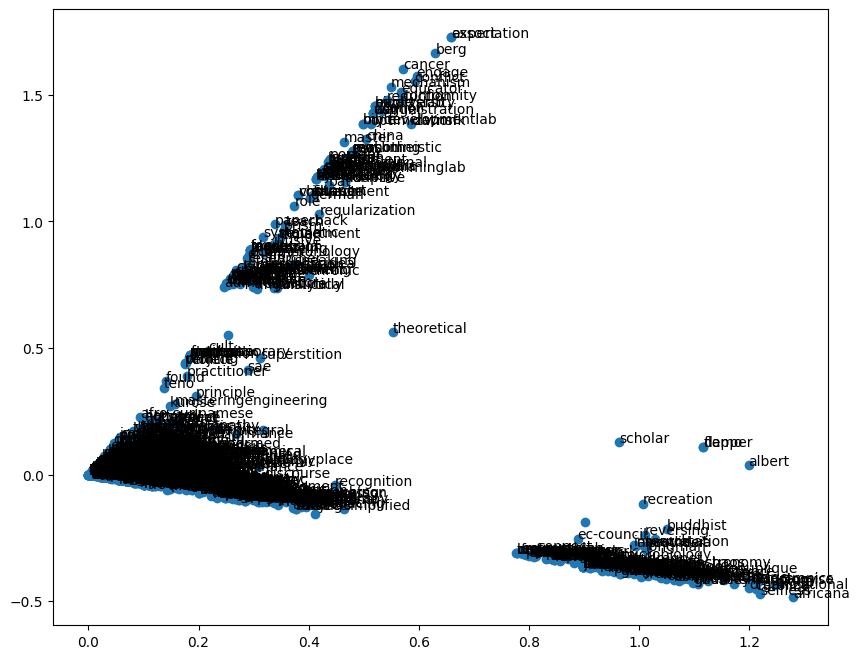

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(Z[:,0],Z[:,1])
for i in range(len(word_2_int)):
    plt.annotate(int_2_words[i],(Z[i,0],Z[i,1]))

This code block creates a scatter plot visualization of the transformed data Z resulting from the Singular Value Decomposition (SVD).

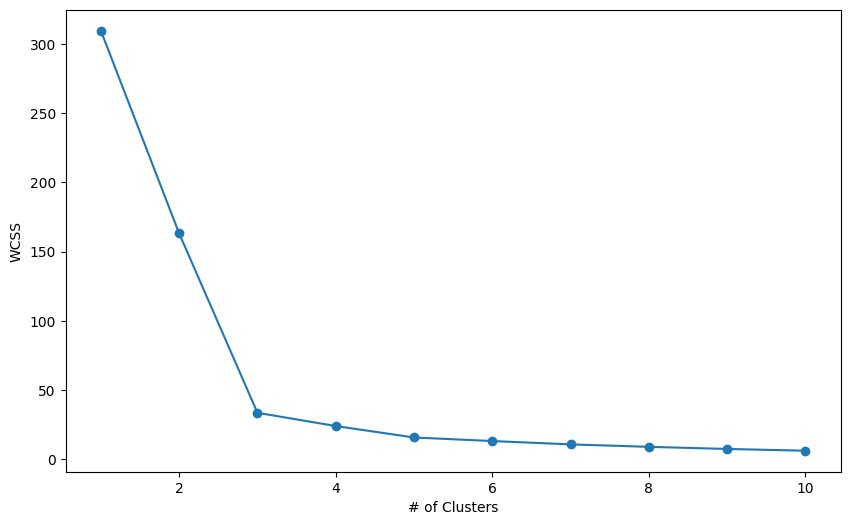

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(Z)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()


This code block iterates through potential numbers of clusters from 1 to 10 and applies K-means clustering to the transformed data Z for each number of clusters. For each iteration, it computes the Within-Cluster Sum of Squares (WCSS), which represents the compactness of clusters. Finally, it plots the number of clusters against the WCSS values, aiming to identify the "elbow point" where adding more clusters doesn't significantly decrease the WCSS, thus indicating the optimal number of clusters for the dataset.

In [ ]:
# Apply k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
labels = kmeans.fit_predict(Z)
centroids = kmeans.cluster_centers_

This code block performs K-means clustering on the transformed data Z with 3 clusters. It uses 10 initializations to find the best clustering solution. After fitting the model, it assigns each data point to its nearest cluster and retrieves the cluster centroids.

In [ ]:
# Analyze clusters to determine themes
cluster_themes = []
for cluster in range(n_clusters):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_titles = [titles[i] for i in cluster_indices]
    all_tokens = []
    for title in cluster_titles:
        all_tokens.extend(tokenizer(title))
    common_words = Counter(all_tokens).most_common(10)
    cluster_themes.append(common_words)
# Print the themes for each cluster
for i, theme in enumerate(cluster_themes):
    print(f"Cluster {i} themes:")
    for word, count in theme:
        print(f"Word: {word}, Count: {count}")
    print("\n")


Cluster 0 themes:
Word: business, Count: 84
Word: system, Count: 81
Word: theory, Count: 80
Word: biology, Count: 75
Word: human, Count: 73
Word: analysis, Count: 72
Word: principle, Count: 68
Word: design, Count: 67
Word: computer, Count: 65
Word: chemistry, Count: 62


Cluster 1 themes:
Word: history, Count: 126
Word: art, Count: 59
Word: volume, Count: 28
Word: american, Count: 19
Word: america, Count: 13
Word: global, Count: 10
Word: western, Count: 9
Word: concise, Count: 9
Word: myartslab, Count: 9
Word: book, Count: 9


Cluster 2 themes:
Word: science, Count: 161
Word: earth, Count: 29
Word: political, Count: 28
Word: computer, Count: 25
Word: life, Count: 15
Word: engineering, Count: 13
Word: statistic, Count: 10
Word: physical, Count: 10
Word: social, Count: 9
Word: actuarial, Count: 9




This code block analyzes the clusters generated by K-means clustering to determine their themes.

It iterates over each cluster, identifies the titles belonging to that cluster, and tokenizes them using the tokenizer() function.
Then, it counts the occurrences of each token across all titles in the cluster and selects the top 10 most common words.
These common words represent the themes of the cluster.
Finally, it prints out the themes for each cluster, listing the most common words along with their respective counts.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


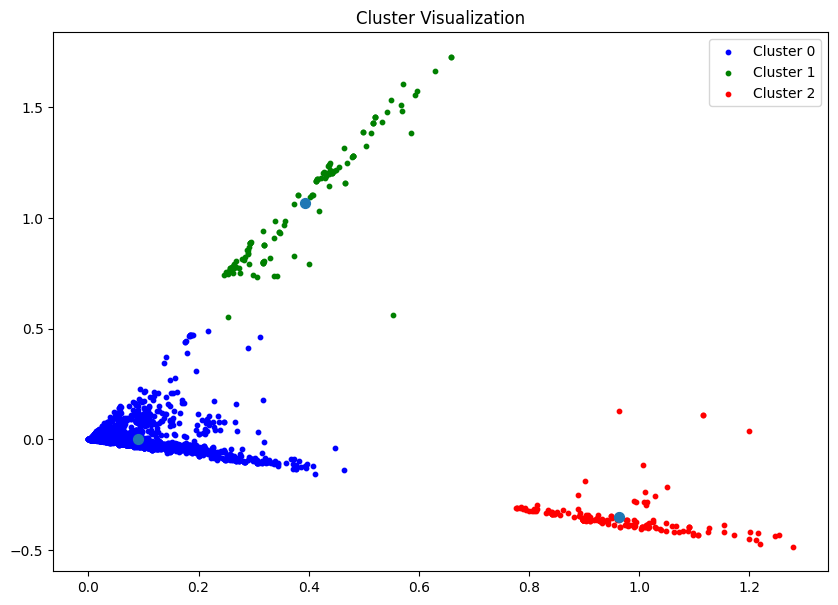

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(Z)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r']
for i in range(3):
    points = Z[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=50)
plt.title('Cluster Visualization')
plt.legend()
plt.show()

This performs K-means clustering on the transformed data Z with 3 clusters. It then visualizes the clusters and their centroids on a scatter plot. Each cluster's data points are plotted in different colors, and the centroids are marked with larger points. This visualization helps understand how the data points are grouped into clusters and the positions of the cluster centroids.

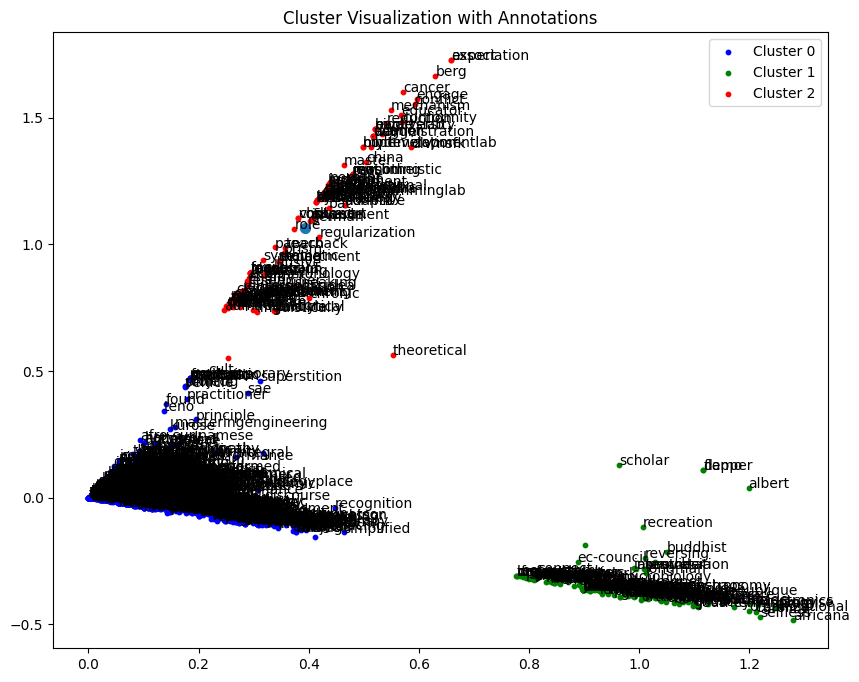

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(Z)
labels = kmeans.labels_

# Plot the clusters with annotations
fig = plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']
for i in range(3):
    points = Z[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i], label=f'Cluster {i}')

# Annotate each point
for i in range(len(word_2_int)):
    plt.annotate(int_2_words[i], (Z[i, 0], Z[i, 1]))

plt.scatter(centroids[:, 0], centroids[:, 1], s=50)

plt.title('Cluster Visualization with Annotations')
plt.legend()
plt.show()

This visualizes the clustering results on a scatter plot, with each cluster's data points shown in different colors. Additionally, it annotates each point with the corresponding word label. Finally, it plots the centroids of each cluster as larger points and displays the cluster visualization with annotations.